# Neural & Behavioral Modeling - Week 9 (Examples)
by Tsung-Ren (Tren) Huang (tren.huang@gmail.com)

In [1]:
%config IPCompleter.greedy=True 
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
from IPython.display import *
from time import sleep
from mpl_toolkits.mplot3d import Axes3D

## 1. Supervised Learning

### 1.1 Supervised Hopfield Network

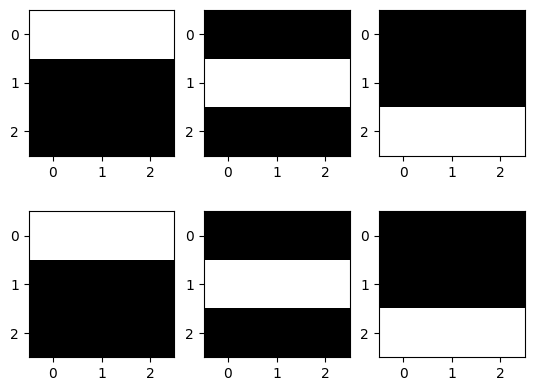

In [2]:
p=array([
    [1,1,1,-1,-1,-1,-1,-1,-1], # 3x3 pattern 1
    [-1,-1,-1,1,1,1,-1,-1,-1], # 3x3 pattern 2
    [-1,-1,-1,-1,-1,-1,1,1,1], # 3x3 pattern 3
])

w=zeros([9,9]);
for i in range(3):
    subplot(2,3,i+1);
    imshow(p[i].reshape((3,3)),cmap='gray')
    w=w+outer(p[(i+1)%3],p[i]); # learning: p[0]->p[1]->p[2]

# Retrieval cue:
subplot(2,3,4)
cue=array([1,1,1,-1,-1,-1,-1,-1,-1])
imshow(cue.reshape((3,3)),cmap='gray')

# Recalling:
cue=p[2]
for t in range(3):
    subplot(2,3,t+4);
    cue=matmul(w,cue)>0
    imshow(cue.reshape((3,3)),cmap='gray')

### 1.2 Classification: Perceptron w/ learning

-1.0
-1.0
1.0
1.0
1.0


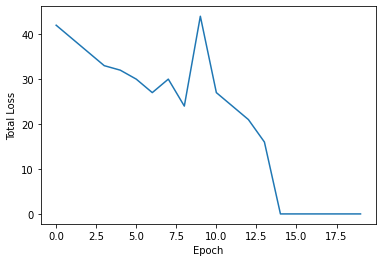

In [79]:
# Supporting functions: -----------------------
def sgd(X, Y): # Stochastic Gradient Descent
    w = zeros(len(X[0]))
    eta = 1 # learning rate
    epochs = 20 # number of training epochs
    errors = [] # error history during training
    for t in range(epochs):
        total_error = 0
        for p, x in enumerate(X): #p=pattern index
            if (dot(X[p], w)*Y[p]) <= 0:
                total_error += (dot(X[p], w)*Y[p])
                w = w + eta*X[p]*Y[p] # Supervised Hebbian learning!
        errors.append(total_error*-1)
    plot(errors); xlabel('Epoch'); ylabel('Total Loss')
    return w
#----------------------------------------------


X = array([   #[x1,x2,bias]
    [-2,4, -1], 
    [4,1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

y = array([-1,-1,1,1,1])

# Learning:
w = sgd(X,y)

# Testing:
for i, x in enumerate(X):
    print(sign(dot(X[i], w))) 


### 1.3 Regression: Delta Rule on a Two-layered Network w/o Bias Terms

#### 1.3.1 Linear activation function for continuous-valued outputs

[[ 0.283  0.008]
 [ 0.448 -0.009]
 [ 0.731 -0.001]
 [ 0.01   0.265]
 [-0.01   0.464]
 [ 0.     0.729]]


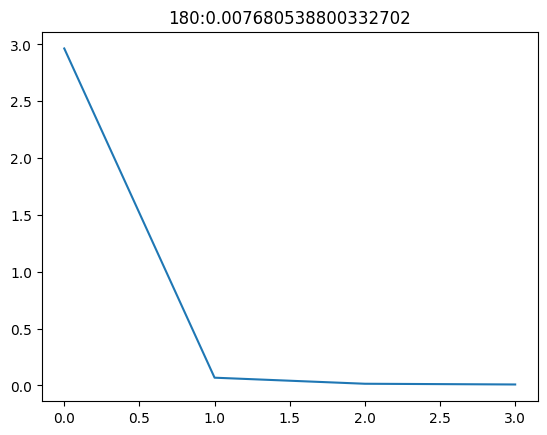

In [3]:
# Here we train a two-layered network of units 
# with a linear activation function f(x)=x
# to associate patterns using the delta rule dW=(t-y)*x

set_printoptions(precision=3,suppress=True)

X=matrix('1 0 0 0;0 1 0 0;1 1 0 0;0 0 1 0;0 0 0 1;0 0 1 1')
Y=matrix('0.3 0;0.5 0;0.7 0;0 0.3;0 0.5;0 0.7') # try continuous values
#Y=matrix('1 0;1 0;1 0;0 1;0 1;0 1') # try binary values
[Np,Nx]=X.shape; # find numbers of patterns and input dimensions 
[Np,Ny]=Y.shape; # find numbers of patterns and output dimensions 
W=asmatrix(random.rand(Ny,Nx)); # set initially random connectivity matrix

eta=.1; # set the learning rate # try 0.1
tol=1e-2; # set the tolerance/stopping criterion; try 0.01
nIts=50000; # set the maximum number of allowed iterations
totErr=10; # set the maximum training error to an initially high value
totErr_hist=[]

for c in range(nIts): # for each learning iteration
    p=mod(c,Np) # sequential presentation of the training samples
    #p=random.randint(nP); # choose pattern pair at random
    
    # Forward propagation:
    y=W*X[p].T # model prediction
    
    # Backward propagation:
    deltaW=eta*outer(Y[p].T-y, X[p]) # delta learning
    W=W+deltaW;  # apply the weight update
    
    # Checking if done:
    if(mod(c,10*Np)==0): # after several updates check total errors
        predY=W*X.T # testing all the training samples
        totErr=sum(multiply(Y.T-predY,Y.T-predY)) # sum of squared errors for all samples
        totErr_hist.append(totErr)
    if(totErr<tol): # one training sample reaches stopping criterion
        break # break if max error is below tolerance
        
plot(totErr_hist);
title(str(c)+':'+str(totErr));
print(predY.T) # predicted Y

#### 1.3.2 Sigmoid activation function for binary-valued outputs

[[0.965 0.035]
 [0.965 0.035]
 [0.999 0.001]
 [0.035 0.965]
 [0.035 0.965]
 [0.001 0.999]]


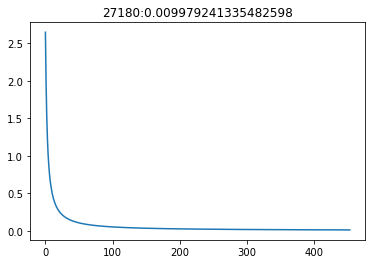

In [87]:
# Here we train a two-layered network of units 
# with the sigmoid/logistic activation function f
# to associate patterns using the delta rule dW=(t-y)*(df/dx)*x

set_printoptions(precision=3,suppress=True)

X=matrix('1 0 0 0;0 1 0 0;1 1 0 0;0 0 1 0;0 0 0 1;0 0 1 1')
Y=matrix('1 0;1 0;1 0;0 1;0 1;0 1')
#Y=matrix('0.3 0;0.5 0;0.7 0;0 0.3;0 0.5;0 0.7') # try continuous values
[Np,Nx]=X.shape; # find numbers of patterns and inputs 
[Np,Ny]=Y.shape; # find numbers of patterns and outputs 
W=asmatrix(random.rand(Ny,Nx)-0.5); # set initially random connectivity matrix

eta=0.1; # set the learning rate # try 0.1
tol=1e-2; # set the tolerance/stopping criterion; try 0.01
nIts=50000; # set the maximum number of allowed iterations
totErr=10; # set the maximum training error to an initially high value
totErr_hist=[]

for c in range(nIts): # for each learning iteration
    p=mod(c,Np) # sequential presentation of the training samples
    #p=random.randint(nP); # choose pattern pair at random
    
    # Forward propagation:
    y0=W*X[p].T
    y=1/(1+exp(-y0)) # activation function
    
    # Backward propagation:
    dy=multiply(y,1-y); # compute the derivative of the sigmoid function
    e=Y[p].T-y; # error e for the chosen input
    deltaW=eta*outer(multiply(e,dy),X[p])
    W=W+deltaW;  # apply the weight update
    
    # Checking if done:
    if(mod(c,10*Np)==0): # after several updates check maximum error
        h=W*X.T # testing all the training samples
        predY=1/(1+exp(-h))
        totErr=sum(multiply(Y.T-predY,Y.T-predY))
        totErr_hist.append(totErr)
    if(totErr<tol): # one training sample reaches stopping criterion
        break # break if max error is below tolerance

plot(totErr_hist);
title(str(c)+':'+str(totErr));
print(predY.T) # predicted Y

### 1.4 Backpropagation on a Three-layered Network w/ Bias Terms
x --U--> y --V--> z

[[0.967 0.033]
 [0.967 0.033]
 [0.972 0.028]
 [0.028 0.972]
 [0.028 0.972]
 [0.021 0.979]]


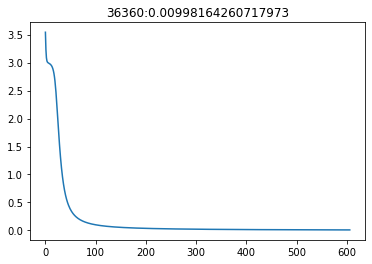

In [92]:
# Here we train a three-layered network of units 
# with the sigmoid/logistic activation function f
# to associate patterns using backpropagation

eta=0.1; # set the learning rate
tol=1e-2; # set the tolerance/stopping criterion; try 0.01
nIts=50000; # set the maximum number of allowed iterations
nHid=1; # set the number of hidden units # try 2
totErr=10; # set the maximum training error to an initially high value
totErr_hist=[]

set_printoptions(precision=3,suppress=True)

X=array([[1,0,0,0],[0,1,0,0],[1,1,0,0],[0,0,1,0],[0,0,0,1],[0,0,1,1]])
Z=array([[1,0],[1,0],[1,0],[0,1],[0,1],[0,1]])
[Np,Nx]=X.shape; # find numbers of patterns and inputs 
[Np,Nz]=Z.shape; # find numbers of patterns and outputs 
U=random.rand(nHid,Nx+1) # set initial input-hidden connectivity matrix
V=random.rand(Nz,nHid+1) # set initial hidden-output connectivity matrix

for c in range(nIts): # for each learning iteration
    p=mod(c,Np) # sequential presentation of the training samples
    #p=random.randint(nP); # choose pattern pair at random
    
    # Forward propagation:
    x=append(X[p],1) # adding the bias term
    y0=1/(1+exp(-dot(U,x))) # compute the hidden unit response
    y=append(y0,1) # adding the bias term
    z=1/(1+exp(-dot(V,y))) # compute the output unit response
    e=Z[p]-z # error e for the chosen input
    
    # Backward propagation:
    zg=e*(z*(1-z)) # compute the output error signal
    yg=y*(1-y)*dot(zg,V) # compute hidden error signal
    deltaV=eta*outer(zg,y); # compute the change in hidden-output weights
    deltaU=eta*outer(yg[0:-1],x) # compute change in input-hidden weights
    V=V+deltaV; # update the hidden-output weights
    U=U+deltaU; # update the input-hidden weights       
    
    # Checking if done:
    if(mod(c,10*Np)==0): # every so often check network performance
        x=hstack([X,ones([Np,1])]) # append bias to all input patterns
        y0=1/(1+exp(-dot(x,U.T))) # compute the hidden unit response
        y=hstack([y0,ones([Np,1])]) # adding the bias term
        z=1/(1+exp(-dot(y,V.T))) # compute the output unit response
        totErr=sum((Z-z)**2); # total squared error over all patterns
        totErr_hist.append(totErr)
    if(totErr<tol): 
        break # break if the total errors within tolerance

plot(totErr_hist);
title(str(c)+':'+str(totErr));
print(z) # predicted Z

## 2. Reinforcement Learning

### 2.1 Temporal Difference Learning

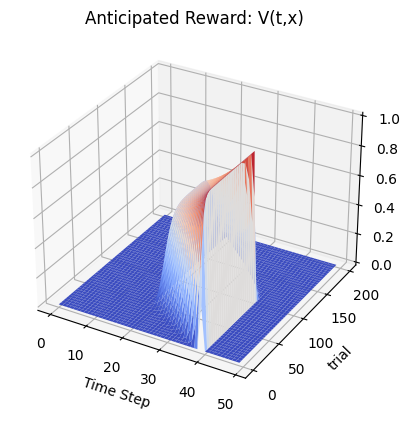

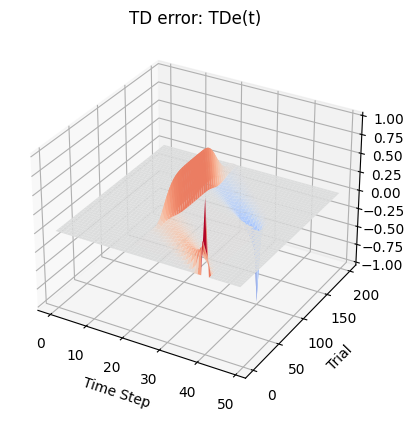

In [5]:
# Simulating the DA neuron responses:

a=0.3 # set learning rate
r=0.97 # temporal discounting
nTrials=200; # set number of trials
nTimes=50; # set number of time steps per trial
qTime=20; # set time of cue
rTime=40; # set time of reward

X=zeros(nTimes) # input vector 
X[qTime:rTime]=1 # binary status: 0=None; 1=Yes
R=zeros(nTimes)  # reward vector
R[rTime]=1 # binary status: 0=None; 1=Yes
V=zeros(nTimes) # value function V(X(t))
TDe=zeros(nTimes) # define prediction unit vector
V_history=zeros([nTrials,nTimes])
TDe_history=zeros([nTrials,nTimes])

for c in range(nTrials): # for each learning trial
    if(c==nTrials/2): R[rTime]=0 # remove reward for later trials
    for t in range(1,nTimes):
        TDe[t]=R[t]+r*V[t]-V[t-1] # TD error
        #V[t-1]=V[t-1]+a*TDe[t] # TD learning: V(t)
        V[t-1]=V[t-1]+a*X[t-1]*TDe[t] # TD learning: V(X(t))

    V_history[c,:]=V # save learned V(t) across trials
    TDe_history[c,:]=TDe # save learned TDe(t) across trials

# plot the results:
fig1=figure()
ax1=fig1.add_subplot(111, projection='3d')
[X,Y]=meshgrid(range(nTimes),range(nTrials))
#ax1.view_init(30, 30)
ax1.plot_surface(X,Y,V_history,cmap=cm.coolwarm)
xlabel('Time Step');ylabel('trial');
title('Anticipated Reward: V(t,x)');

fig2=figure(2);
ax2=fig2.add_subplot(111, projection='3d')
ax2.plot_surface(X,Y,TDe_history,cmap=cm.coolwarm)
xlabel('Time Step');ylabel('Trial')
title('TD error: TDe(t)');

### 2.2 Q Learning
See "<a href="https://blog.csdn.net/bornfree5511/article/details/103816690">A Painless Q-Learning Tutorial</a>" for more information.
<img src=https://pic1.xuehuaimg.com/proxy/csdn/https://pic1.xuehuaimg.com/proxy/csdn/https://img-blog.csdn.net/20130717235436015>

In [131]:
# Codes adapted from https://gist.github.com/kastnerkyle/d127197dcfdd8fb888c2

# defines the reward/connection graph
r = np.array([[-1, -1, -1, -1,  0,  -1],
              [-1, -1, -1,  0, -1, 100],
              [-1, -1, -1,  0, -1,  -1],
              [-1,  0,  0, -1,  0,  -1],
              [ 0, -1, -1,  0, -1, 100],
              [-1,  0, -1, -1,  0, 100]]).astype("float32")

q = np.zeros_like(r)

def update_q(state, next_state, action, alpha, gamma):
    rsa = r[state, action]
    qsa = q[state, action]
    new_q = qsa + alpha * (rsa + gamma * max(q[next_state, :]) - qsa) # The learning rule!
    q[state, action] = new_q
    # renormalize row to be between 0 and 1
    rn = q[state][q[state] > 0] / np.sum(q[state][q[state] > 0])
    q[state][q[state] > 0] = rn
    return r[state, action]


def show_traverse():
    # show all the greedy traversals
    for i in range(len(q)):
        current_state = i
        traverse = "%i -> " % current_state
        n_steps = 0
        while current_state != 5 and n_steps < 20:
            next_state = np.argmax(q[current_state])
            current_state = next_state
            traverse += "%i -> " % current_state
            n_steps = n_steps + 1
        # cut off final arrow
        traverse = traverse[:-4]
        print("Greedy traversal for starting state %i: %s" % (i, traverse))

# Core algorithm
gamma = 0.8
alpha = 1.
n_episodes = 1E3
n_states = 6
n_actions = 6
epsilon = 1
random_state = np.random.RandomState(1999)
for e in range(int(n_episodes)):
    states = list(range(n_states))
    random_state.shuffle(states)
    current_state = states[0]
    goal = False
    counter=0
    while not goal:
        counter+=1
        # epsilon greedy
        valid_moves = r[current_state] >= 0
        if random_state.rand() < epsilon: # Exploration:
            actions = np.array(list(range(n_actions)))
            actions = actions[valid_moves == True]
            if type(actions) is int:
                actions = [actions]
            random_state.shuffle(actions)
            action = actions[0]
            next_state = action
        else: # Exploitation:
            if np.sum(q[current_state]) > 0:
                action = np.argmax(q[current_state]) # Best action
            else:
                # Don't allow invalid moves at the start
                # Just take a random move
                actions = np.array(list(range(n_actions)))
                actions = actions[valid_moves == True]
                random_state.shuffle(actions)
                action = actions[0]
            next_state = action
        reward = update_q(current_state, next_state, action,
                          alpha=alpha, gamma=gamma)
        # Goal state has reward 100
        if reward > 1:
            goal = True
        current_state = next_state

print(r)
print(counter)
print(q)
show_traverse()

[[ -1.  -1.  -1.  -1.   0.  -1.]
 [ -1.  -1.  -1.   0.  -1. 100.]
 [ -1.  -1.  -1.   0.  -1.  -1.]
 [ -1.   0.   0.  -1.   0.  -1.]
 [  0.  -1.  -1.   0.  -1. 100.]
 [ -1.   0.  -1.  -1.   0. 100.]]
8
[[0.    0.    0.    0.    1.    0.   ]
 [0.    0.    0.    0.003 0.    0.997]
 [0.    0.    0.    1.    0.    0.   ]
 [0.    0.117 0.41  0.    0.473 0.   ]
 [0.    0.    0.    0.    0.    1.   ]
 [0.    0.002 0.    0.    0.004 0.993]]
Greedy traversal for starting state 0: 0 -> 4 -> 5
Greedy traversal for starting state 1: 1 -> 5
Greedy traversal for starting state 2: 2 -> 3 -> 4 -> 5
Greedy traversal for starting state 3: 3 -> 4 -> 5
Greedy traversal for starting state 4: 4 -> 5
Greedy traversal for starting state 5: 5
